# Исследование объявлений о продаже квартир

**Цель исследования:** определить параметры, которые помогут построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

**Данные:** исторические данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление
1. [Изучение данных из файла](#1)
    <br>1.1. [Вывод](#1.1)
2. [Предобработка данных](#2)
    <br>2.1. [Вывод](#2.1)
3. [Расчёты и добавление результатов в таблицу](#3)
    <br>3.1. [Вывод](#3.1)
4. [Исследовательский анализ данных](#4)
    <br>4.1. [Площадь квартиры](#4.1)
    <br>4.2. [Цена](#4.2)
    <br>4.3. [Число комнат](#4.3)
    <br>4.4. [Высота потолков](#4.4)
    <br>4.5. [Время продажи квартиры](#4.5)
    <br>4.6. [Зависимость цены от разных признаков](#4.6)
    <br>4.7. [Цена квартиры в разных населённых пунктах](#4.7)
    <br>4.8. [Изучение предлоэжений квартир в Санкт-Петербурге](#4.8)
    <br>4.9. [Зависимость цены квартиры в Санкт-Петербурге от разных параметров](#4.9)
    <br>4.10. [Вывод](#4.10)
5. [Заключение](#5)

<a id="1"></a>
## 1. Изучение данных из файла

Импортируем необходимые для работы библиотеки, считаем csv-файл и выведем общую информацию о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style()
sns.set(rc = {'figure.figsize':(12, 7)})

In [2]:
row_data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
row_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
row_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<a id="1.1"></a>
### 1.1. Вывод

В данных есть пропуски. В некоторых случаях пропуски появились, вероятно, из-за того, что пользователи не указывали какие-то характеристики квартир (например, высоту потолка, тип жилья или наличие балкона), в других — из-за отсутствия объектов поблизости (количество парков и водоёмов в радиусе 3 км).

<a id="2"></a>
## 2. Предобработка данных
Сделаем копию датафрейма с исходными данными. Будем работать только с ней.


In [5]:
data = row_data.copy()

Посмотрим, сколько процентов пропусков в данных:

In [6]:
data.isna().sum()/data.shape[0] * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

В некоторых столбцах больше половины - пропущенные значения.

Посмотрим на некоторые столбцы.

In [7]:
data["is_apartment"].unique()

array([nan, False, True], dtype=object)

In [8]:
data["balcony"].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Заменить отсутствующие значения в `"is_apartment"` не получится, поскольку в некоторых случаях сложно сказать, является ли квартира апартаментами или нет. При этом заменить пропуски в `"balcony"` можно на `0`, предположив, что число балконов не указано в тех случаях, когда балкон в квартире отсутствует. 

In [9]:
data["balcony"].fillna(0, inplace=True)

In [10]:
# проверка "balcony" на пропущенные значения
# data["balcony"].isna().sum()

Пропуски в `"ceiling_height"` можно заменить медианным значением, а вот заменить пропуски в `"floors_total"`, `"living_area"`, `"kitchen_area"`, `"airports_nearest"`, `"cityCenters_nearest"`, `"parks_nearest"`, `"ponds_around3000"`, `"ponds_nearest"`, `"days_exposition"` не получится, так как использовать средние значения или медиану для расстояния до аэропорта или количества водоёмов поблизости будет некорректно (слишком много значений пропущено).

Посмотрим на значения в `"ceiling_height"` прежде чем заменим пропуски.

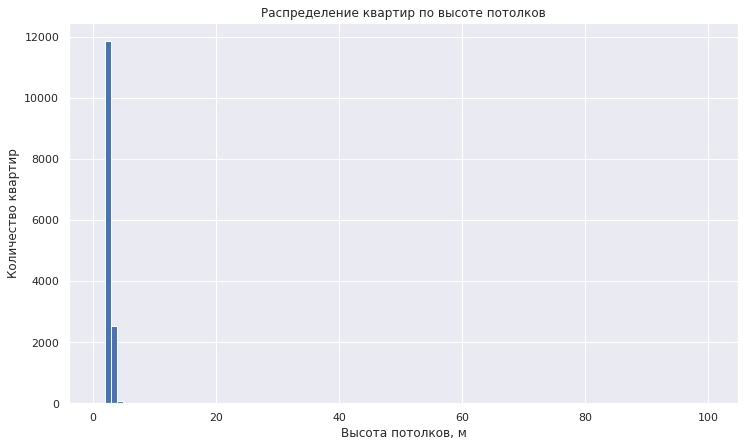

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
ax = data["ceiling_height"].plot(kind="hist", bins=100)
ax.set(xlabel="Высота потолков, м", 
       ylabel="Количество квартир", 
       title="Распределение квартир по высоте потолков")
plt.show()

data["ceiling_height"].describe()

Видно, что в данных есть аномальные значения (вряд ли существуют квартиры с высотой потолка 1 м или 100 м). Исходя из здравого смысла, предположим, что высота потолка в квартире не бывает меньше 2 м и больше 5 м. Посмотрим, какая доля данных удовлетворяет этому условию:

In [12]:
print("Доля квартир с высотой потолка от 2 до 5 м:", end=" ")
print(
    ((data["ceiling_height"] <= 5)&(data["ceiling_height"] >= 2)).sum() / (data["ceiling_height"]).count()
)

Доля квартир с высотой потолка от 2 до 5 м: 0.9973110865968009


Подавляющее количество квартир удовлетворяет этому предположению, поэтому можем избавится от строк с аномальными значениями в `"ceiling_height"`.

In [13]:
mask = ((data["ceiling_height"] > 5) | (data["ceiling_height"] < 2))
data.drop(data[mask].index, inplace=True)

In [14]:
data["ceiling_height"].describe()

count    14465.000000
mean         2.725439
std          0.271805
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Заменим пропущенные значения в `"ceiling_height"` медианным значением и построим гистограмму этого признака:

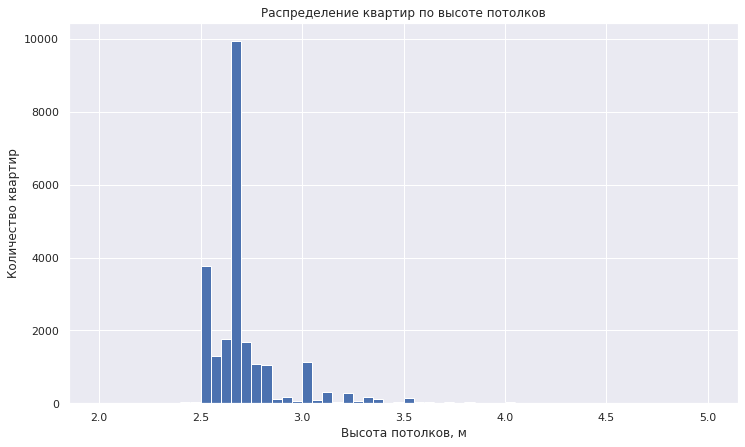

In [15]:
data["ceiling_height"].fillna(data["ceiling_height"].median(), inplace=True)


ax = data["ceiling_height"].plot(kind="hist", bins=60, range=(2, 5), title="Распределение квартир по высоте потолков");
ax.set(xlabel="Высота потолков, м", ylabel="Количество квартир")
plt.show()

Полученное распределение сложно отнести к какому-то конкретному виду (оно не похоже ни на нормальное, ни на пуассоновское, и вообще не очень похоже на что-то). Тем не менее, можно сделать вывод, что типичное значение высоты потолка находится в диапазоне от 2.5 до 3 метров.

In [16]:
# проверка "ceiling_height" на пропущенные значения
# data["ceiling_height"].isna().sum()

Поскольку заполнить пропуски в столбцах `"floors_total"`, `"living_area"` и `"kitchen_area"` не представляется возможным, удалим их.

In [17]:
data.dropna(subset=("floors_total", "living_area", "kitchen_area"), inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20913 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20913 non-null  int64  
 1   last_price            20913 non-null  float64
 2   total_area            20913 non-null  float64
 3   first_day_exposition  20913 non-null  object 
 4   rooms                 20913 non-null  int64  
 5   ceiling_height        20913 non-null  float64
 6   floors_total          20913 non-null  float64
 7   living_area           20913 non-null  float64
 8   floor                 20913 non-null  int64  
 9   is_apartment          2527 non-null   object 
 10  studio                20913 non-null  bool   
 11  open_plan             20913 non-null  bool   
 12  kitchen_area          20913 non-null  float64
 13  balcony               20913 non-null  float64
 14  locality_name         20875 non-null  object 
 15  airports_nearest   

In [19]:
dropped = (1 - data.shape[0]/row_data.shape[0]) * 100
print(f"Удалено строк: {dropped:.1f}%")

Удалено строк: 11.8%


Заменим типы данных в некоторых столбцах. Логично, если количество этажей и балконов будут записаны целыми числами.

In [20]:
types = {
    "floors_total": "int",
    "balcony": "int"
}

data = data.astype(types)

Приведём `"first_day_exposition"` в тип `datetime` и сохраним в столбце `"formated_first_day_exposition"`.

In [21]:
data["formated_first_day_exposition"] = pd.to_datetime(data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S")
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,formated_first_day_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,NaN,...,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10


<a id="2.1."></a>
### 2.1. Вывод
Изучены пропуски в данных, заполнены пропуски в некоторых признаках. Построена гистограмму распределения квартир по высоте потолков, выявлена типичная высота потолков в квартире. Отформатирована дата публикации объявления (приведена к типу `datetime`).

<a id="3"></a>
## 3. Расчёты и добавление результатов в таблицу
Добавим столбец `"price_per_square_meter"` с ценой за квадратный метр (и округлим значения до двух знаков после запятой).

In [22]:
data["price_per_square_meter"] = (data["last_price"]/data["total_area"]).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,formated_first_day_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20,92785.71
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19,100000.00
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10,95065.79


Добавим столбцы `"weekday_exposition"`, `"month_exposition"`, `"year_exposition"`.

In [23]:
data["weekday_exposition"] = data.formated_first_day_exposition.dt.weekday
data["month_exposition"] = data.formated_first_day_exposition.dt.month
data["year_exposition"] = data.formated_first_day_exposition.dt.year

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,formated_first_day_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,2019-03-07,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,2018-12-04,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,2015-08-20,92785.71,3,8,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,2018-06-19,100000.00,1,6,2018
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55.0,2018-09-10,95065.79,0,9,2018


Создадим столбец `"floor_category"` со значениями `"первый"`, `"последний"` и `"другой"`.

In [25]:
data["floor_category"] = "другой"
data["floor_category"].where(data["floor"] != 1, "первый", inplace=True)
data["floor_category"].where(data["floor"] != data["floors_total"], "последний", inplace=True)

data["floor_category"].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Добавлим столбцы с отношением жилой площади к общей площади и площади кухни к общей.

In [26]:
data["living_total_rate"] = data["living_area"] / data["total_area"]
data["kitchen_total_rate"] = data["kitchen_area"] / data["total_area"]

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,formated_first_day_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_rate,kitchen_total_rate
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,755.0,NaN,2019-03-07,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,...,NaN,81.0,2018-12-04,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,574.0,558.0,2015-08-20,92785.71,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,48.0,121.0,2018-06-19,100000.00,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,NaN,...,NaN,55.0,2018-09-10,95065.79,0,9,2018,другой,0.473684,0.299342


<a id="3.1"></a>
### 3.1. Вывод
Сконструированы и добавлены новые признаки, которые позже будут использоваться для анализа цен.

<a id="4"></a>
## 4. Исследовательский анализ данных
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Так как будем строить гистограммы с разными параметрами, использовать цикл будет не очень удобно.

<a id="4.1"></a>
### 4.1. Площадь квартиры
Посмотрим на статистические характеристики признака `"total_area"`.

In [27]:
data["total_area"].describe(percentiles=[0.50, 0.99])

count    20913.000000
mean        60.498864
std         34.402305
min         14.000000
50%         52.200000
99%        190.000000
max        900.000000
Name: total_area, dtype: float64

Медиана площади квартир — 52.2 кв.м. При этом площадь более 99% квартир меньше 200 кв.м. Построим гистограмму.

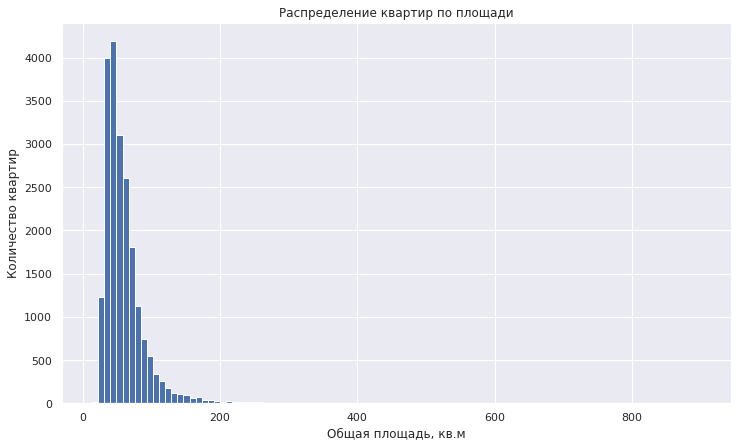

In [28]:
ax = data["total_area"].plot(kind="hist", bins=100, title="Распределение квартир по площади");
ax.set(xlabel="Общая площадь, кв.м", ylabel="Количество квартир")
plt.show()

Полученное распределение по форме напоминает пуассоновское. 

<a id="4.2"></a>
### 4.2. Цена
Посмотрим на статистические характеристики признака `"last_price"`.

In [29]:
data["last_price"].describe(percentiles=[0.025, 0.975])

count    2.091300e+04
mean     6.488778e+06
std      9.504577e+06
min      1.219000e+04
2.5%     1.497200e+06
50%      4.700000e+06
97.5%    2.185200e+07
max      4.200000e+08
Name: last_price, dtype: float64

Медиана цена — 4.7 млн. При этом можно наблюдать довольно большой разброс значений, от 12 тыс. до 420 млн. А 95% значений цены приблизительно лежит в интервале от 1.5 до 21.8 млн. Построим гистограмму, диапазон значений возьмём от 10 тыс. до 30 млн.

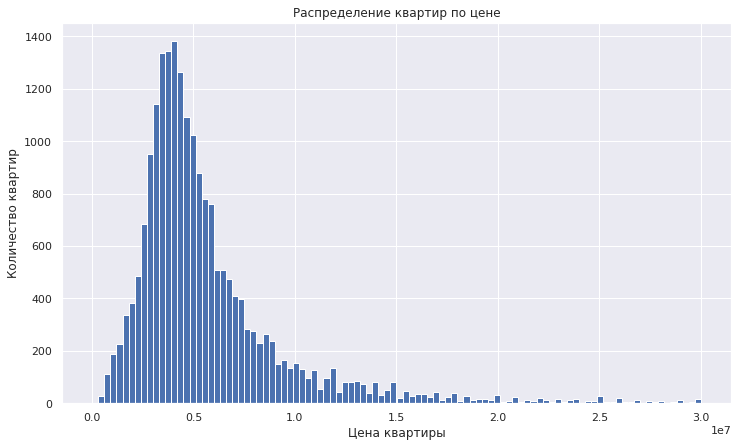

In [30]:
ax = data["last_price"].plot(kind="hist", bins=100, range=(1e4, 3e7), title="Распределение квартир по цене");
ax.set(xlabel="Цена квартиры", ylabel="Количество квартир")
plt.show()

Распределение похоже на логнормальное. 

<a id="4.3"></a>
### 4.3. Число комнат
Посмотрим на статистические характеристики признака `"rooms"`.

In [31]:
data["rooms"].describe()

count    20913.000000
mean         2.095682
std          1.064385
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В среднем в квартире две комнаты, медианное значение совпадает со средним.

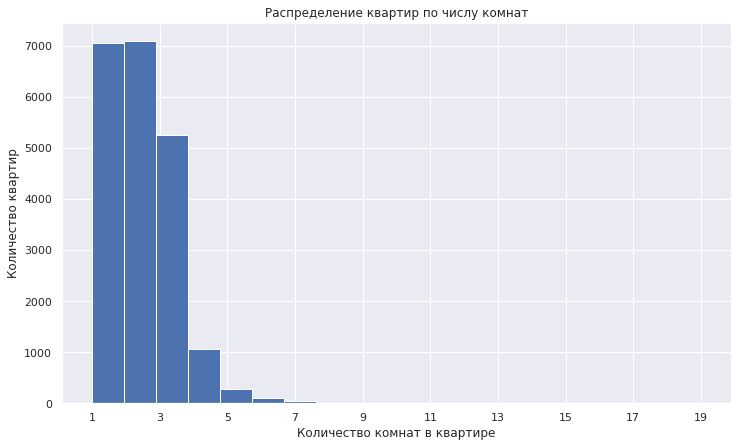

In [32]:
ax = data["rooms"].plot(kind="hist", bins=19, xticks=range(1, 20, 2), title="Распределение квартир по числу комнат");
ax.set(xlabel="Количество комнат в квартире", ylabel="Количество квартир")
plt.show()

Распределение похоже на пуассоновское.

<a id="4.4"></a>
### 4.4. Высота потолков
Посмотрим на статистические характеристики признака `"ceiling_height"`.

In [33]:
data["ceiling_height"].describe()

count    20913.000000
mean         2.696796
std          0.219299
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Среднее и медианное значение почти совпадают (приблизительно 2.65 м). 

_(Это объясняется тем, что пропущенные значения были заменены на медиану)_

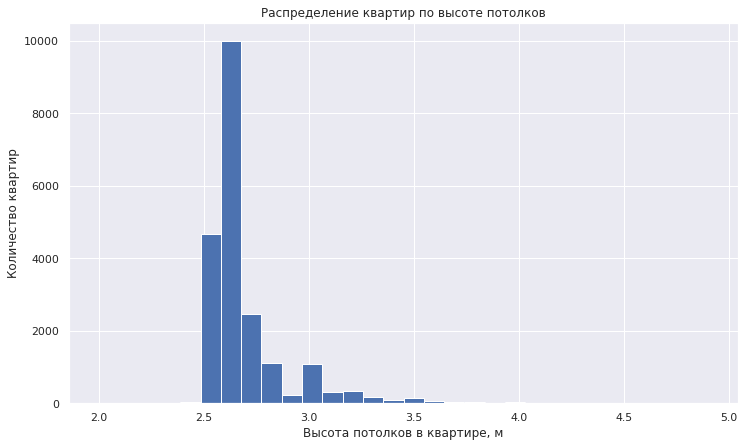

In [34]:
ax = data["ceiling_height"].plot(kind="hist", bins=30, title="Распределение квартир по высоте потолков");
ax.set(xlabel="Высота потолков в квартире, м", ylabel="Количество квартир")
plt.show()

Распределение по внешнему виду определить сложно. 

<a id="4.5"></a>
### 4.5. Время продажи квартиры
Посмотрим на столбец `"days_exposition"`. Там есть пропущенные значения, вероятно, из-за того, что объявление на момент сохранения данных ещё не было снято.

In [35]:
data["days_exposition"].describe([0.09, 0.5, 0.96])

count    18035.000000
mean       185.663931
std        222.052283
min          1.000000
9%          15.000000
50%        102.000000
96%        719.000000
max       1580.000000
Name: days_exposition, dtype: float64

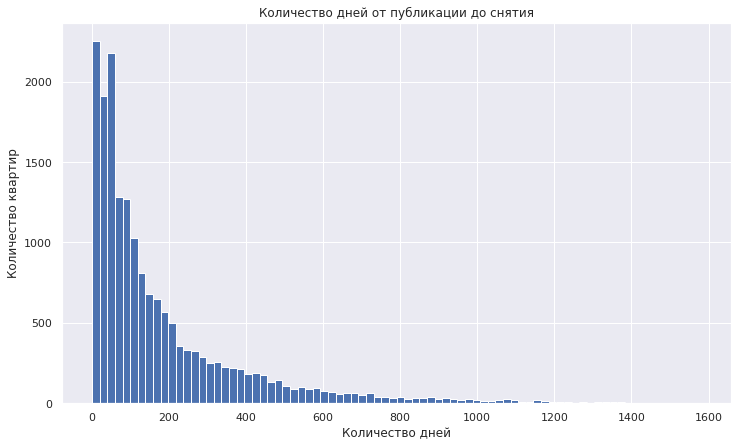

In [36]:
ax = data["days_exposition"].plot(kind="hist", bins=80, title="Количество дней от публикации до снятия");
ax.set(xlabel="Количество дней", ylabel="Количество квартир")
plt.show()

Медиана равна 102 дням, среднее значение — почти 186 дням; такое отличие среднего от медианы обусловлено большим "хвостом" распределения. При этом 95% всей выборки лежит в интервале от 6 до 856 дней, минимальное значение — 1 день, а максимальное — 1580 дней. Весьма сомнительно, что объявление было снято через несколько дней по причине продажи квартиры, скорее всего, на снятие повлияли какие-то другие причины. С другой стороны, в ряде случаев квартиры действительно могут продаваться несколько лет, однако это происходит редко. Поэтому будем считать, что "разумные" значения времени продажи квартиры лежат от 14 до 712 дней. 

_(Если использовать такой интервал, то потеряем приблизительно 13% данных)_

Гистограмма по отфильтрованным данным выглядит так.

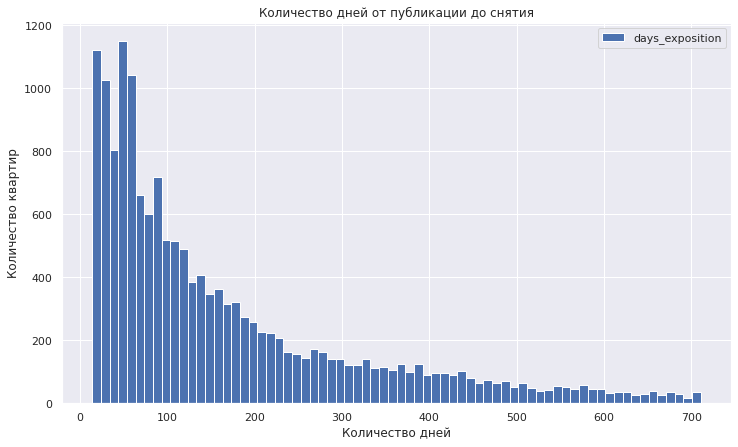

In [37]:
mask = "(days_exposition >= 14) & (days_exposition <= 712)"

data.query(mask, inplace=True)

ax = data.plot(y="days_exposition", kind="hist", bins=70, title="Количество дней от публикации до снятия");
ax.set(xlabel="Количество дней", ylabel="Количество квартир")
plt.show()

Распределение по форме отдалённо напоминает пуассоновское. Заметен провал в районе 30 дней.

<a id="4.6"></a>
### 4.6. Зависимость цены от разных признаков
Чтобы посмотреть, какое влияние на цену квартиры оказывают количественные признаки (площадь квартиры, количество комнат и расстояние до центра), посчитаем коэффициенты корреляции Пирсона. 

In [38]:
features = ["last_price", "total_area", "rooms", "cityCenters_nearest"]

data[features].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.686914,0.384949,-0.211502
total_area,0.686914,1.000000,0.771385,-0.227062
rooms,0.384949,0.771385,1.000000,-0.188103
cityCenters_nearest,-0.211502,-0.227062,-0.188103,1.000000


Как видно из получившейся матрицы, между ценой квартиры и её площадью есть умеренно сильная положительная взаимосвязь (то есть при увеличении площади квартиры растёт и её цена), несколько слабее связь между ценой и количеством комнат. Между ценой и расстоянием до центра города есть не очень сильная отрицательная связь (чем больше расстояние до центра, тем меньше цена). Связи между ценой квартиры и этими признаками выглядят логично.

Чтобы посмотреть на влияние этажа (первый или последний) и дня недели (месяца, года) размещения объявления на цену, построим диаграмму размаха:

In [39]:
pivot_floor = (data.query("last_price <= 2.1e7")
                   .pivot_table(index="floor_category", values="last_price", aggfunc=["median", "mean"]))

pivot_floor.columns = ["median", "mean"]
pivot_floor

,median,mean
floor_category,,
другой,4690000.0,5.551568e+06
первый,3850000.0,4.292254e+06
последний,4200000.0,5.088343e+06


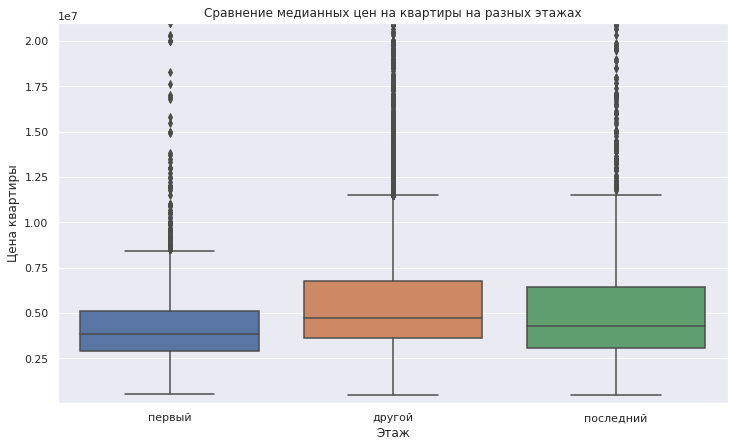

In [40]:
(sns.boxplot(x="floor_category", y="last_price", data=data)
    .set(title="Сравнение медианных цен на квартиры на разных этажах", xlabel="Этаж", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.1e7);

**Вывод:** квартиры на первом этаже стоят несколько дешевле, чем квартиры на других этажах.

Теперь посмотрим, влияет ли день публикации объявления на цену квартиры.

In [41]:
weekday_pivot = data.pivot_table(index="weekday_exposition", values="last_price", aggfunc=["median", "mean"])

weekday_pivot.columns = ["median", "mean"]
weekday_pivot.index = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
weekday_pivot.index.name = "weekday_exposition"

weekday_pivot

,median,mean
weekday_exposition,,
monday,4550000.0,6.292041e+06
tuesday,4600000.0,6.102944e+06
wednesday,4550000.0,6.240237e+06
thursday,4600000.0,6.354395e+06
friday,4500000.0,5.889997e+06
saturday,4500000.0,6.521596e+06
sunday,4499000.0,6.040414e+06


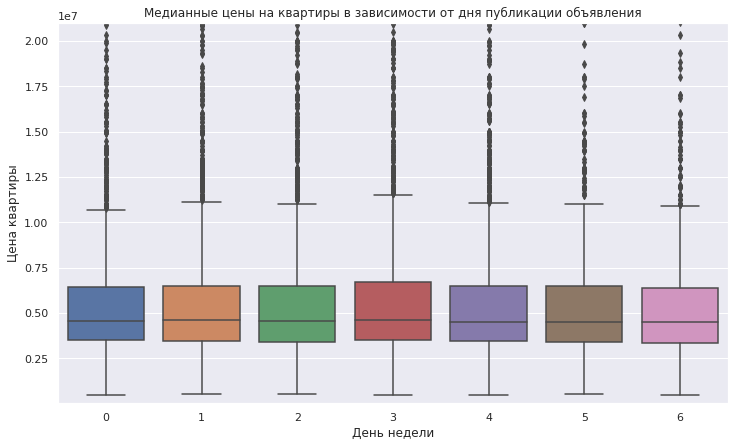

In [42]:
(sns.boxplot(x="weekday_exposition", y="last_price", data=data)
    .set(title="Медианные цены на квартиры в зависимости от дня публикации объявления", 
         xlabel="День недели", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.1e7);

**Вывод:** зависимость цены квартиры от дня публикации объявления не наблюдается.

Проверим, оказывает ли влияние месяц публикации объявления.

In [43]:
month_pivot = data.pivot_table(index="month_exposition", values="last_price", aggfunc=["median", "mean"])

month_pivot.columns = ["median", "mean"]
month_pivot.index = ["january", "february", "march", "april", "may", "june",
                     "jule", "august", "september", "october", "november", "december"]

month_pivot.index.name = "month_exposition"

month_pivot

,median,mean
month_exposition,,
january,4500000.0,5.774143e+06
february,4600000.0,6.280604e+06
march,4500000.0,5.948456e+06
april,4550000.0,6.721158e+06
may,4500000.0,6.305020e+06
june,4425000.0,6.243415e+06
jule,4575000.0,6.190963e+06
august,4522500.0,5.989009e+06
september,4650000.0,6.232731e+06


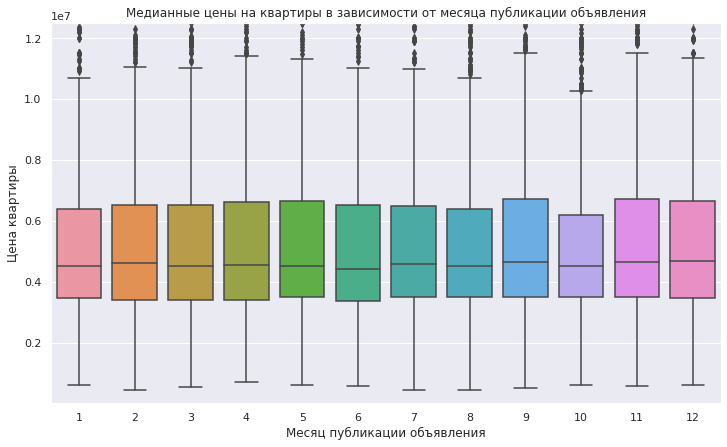

In [44]:
(sns.boxplot(x="month_exposition", y="last_price", data=data)
    .set(title="Медианные цены на квартиры в зависимости от месяца публикации объявления",
         xlabel="Месяц публикации объявления", 
         ylabel="Цена квартиры"))

plt.ylim(1e4, 1.25e7);

**Вывод:** в ноябре и декабре квартиры стоят дороже всего, минимальная цена — в июне.

Аналогично рассмотрим влияние года публикации.

In [45]:
year_pivot = data.pivot_table(index="year_exposition", values="last_price", aggfunc=["median", "mean", "count"])

year_pivot.columns = ["median", "mean", "count"]

year_pivot

,median,mean,count
year_exposition,,,
2014,7476560.0,1.003434e+07,37
2015,4980000.0,7.496549e+06,627
2016,4490000.0,6.411055e+06,2173
2017,4500000.0,6.344521e+06,6623
2018,4550000.0,5.778523e+06,5698
2019,4850000.0,6.082978e+06,686


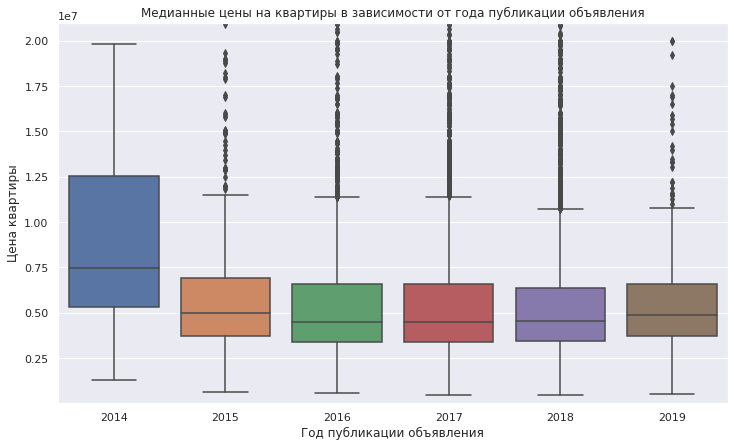

In [46]:
(sns.boxplot(x="year_exposition", y="last_price", data=data)
    .set(title="Медианные цены на квартиры в зависимости от года публикации объявления",
         xlabel="Год публикации объявления", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.1e7);

**Вывод:** наибольшая медианная цена оказалась в 2014-м году (это связано с малым объёмом выборки за этот год). Начиная с 2016-го года цена растёт.

<a id="4.7"></a>
### 4.7. Цена квартиры в разных населённых пунктах
Выделим 10 населённых пунктов с наибольшим числом объявлений:

In [47]:
top10_localities = data["locality_name"].value_counts()[:10]
top10_localities

Санкт-Петербург      10561
посёлок Мурино         345
посёлок Шушары         326
Всеволожск             275
Колпино                260
Пушкин                 239
посёлок Парголово      231
Гатчина                217
деревня Кудрово        188
Петергоф               150
Name: locality_name, dtype: int64

In [48]:
prices_in_top10 = (data
                   .query("(locality_name.isin(@top10_localities.index)) & (last_price <= 2.1e7)")
                   .pivot_table(index="locality_name", values="price_per_square_meter", aggfunc=["mean",  "count"])
)
prices_in_top10.columns = ["mean",  "count"]
prices_in_top10.sort_values(by="mean", ascending=False).round(2)

,mean,count
locality_name,,
Санкт-Петербург,106592.88,10228
Пушкин,100421.86,234
деревня Кудрово,92898.59,188
посёлок Парголово,89672.38,231
посёлок Мурино,85751.32,345
Петергоф,82689.82,150
посёлок Шушары,77532.64,326
Колпино,74070.11,259
Всеволожск,67213.91,274


Получается, что максимальная стоимость квадратного метра в Санкт-Петербурге (выглядит правдоподобно), а минимальная — в Гатчине и Всеволжске.

<a id="4.8"></a>
### 4.8. Изучение предложений квартир в Санкт-Петербурге

Выделим данные по квартирам в Санкт-Петербурге в отдельный датафрейм. Округлим до целого числа расстояние (в километрах) до центра города и добавим в данные.

In [49]:
spb_data = (data
            .query("locality_name == 'Санкт-Петербург'")
            .dropna(subset=["cityCenters_nearest"])
)

spb_data["distance_to_center"] = (spb_data["cityCenters_nearest"]/1000).round().astype("int")

spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,formated_first_day_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_rate,kitchen_total_rate,distance_to_center
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,558.0,2015-08-20,92785.71,3,8,2015,другой,0.612500,0.148214,14
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,121.0,2018-06-19,100000.00,1,6,2018,другой,0.320000,0.410000,8
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,NaN,...,289.0,2017-02-26,88524.59,6,2,2017,другой,0.714754,0.106557,15
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,NaN,...,137.0,2017-11-16,127525.25,3,11,2017,другой,0.512626,0.214646,14
15,16,4650000.0,39.0,2017-11-18T00:00:00,1,2.65,14,20.5,5,NaN,...,19.0,2017-11-18,119230.77,5,11,2017,другой,0.525641,0.194872,14


Построим график зависимости цены квартиры от расстояния до центра города.

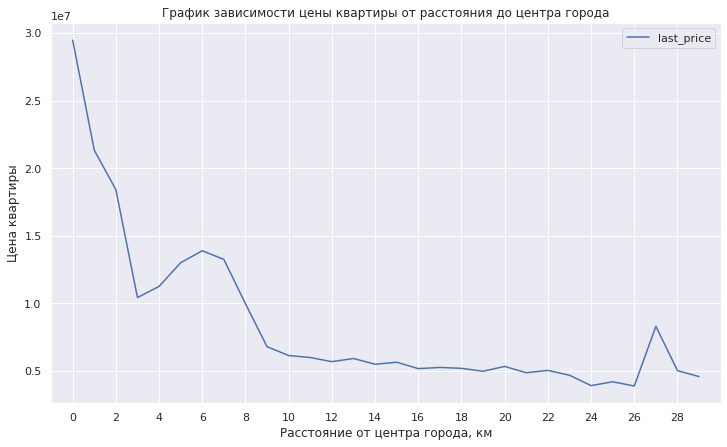

In [50]:
spb_data_pivot = spb_data.pivot_table(index="distance_to_center", values="last_price")
(spb_data_pivot.plot(xticks=range(0, 30, 2))
               .set(ylabel="Цена квартиры", xlabel="Расстояние от центра города, км",
                    title="График зависимости цены квартиры от расстояния до центра города"))


plt.xlim(-1, 30);

Можно разделить город на три зоны: от 0 до 3 км, от 3 до 9 км и более 9 км. График сильно меняется в области от 0 до 3 км. Будем считать, что это и есть центр города.

<a id="4.9"></a>
### 4.9. Зависимость цены квартиры в Санкт-Петербурге от разных параметров

<a id="4.9.1"></a>
#### 4.9.1. Площадь
Выделим квартиры в центре Петербурга (то есть `"distance_to_center"` меньше либо равен 3). Изучим для этих квартир параметры аналогично п.п. 4.1-4.4. 

In [51]:
spb_data_center = spb_data.query("distance_to_center <= 3")
spb_data = spb_data.query("distance_to_center > 3")

In [52]:
spb_data_center["total_area"].describe(percentiles=[0.50, 0.99])

count    557.000000
mean      96.392657
std       54.304819
min       27.000000
50%       83.000000
99%      289.380000
max      483.900000
Name: total_area, dtype: float64

In [53]:
spb_data["total_area"].describe(percentiles=[0.50, 0.99])

count    9985.000000
mean       60.995971
std        35.337362
min        20.000000
50%        52.600000
99%       187.480000
max       900.000000
Name: total_area, dtype: float64

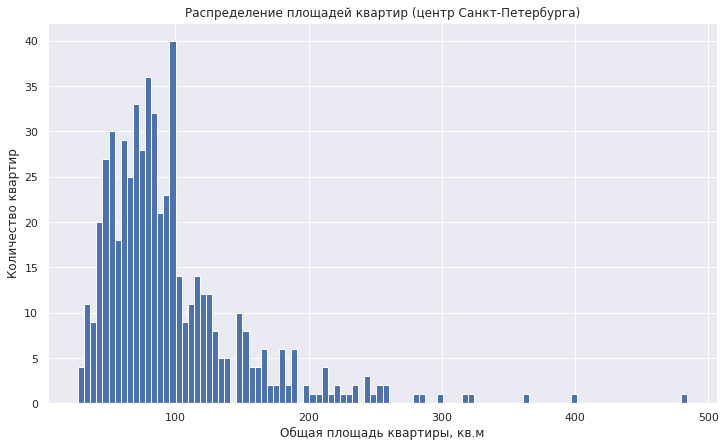

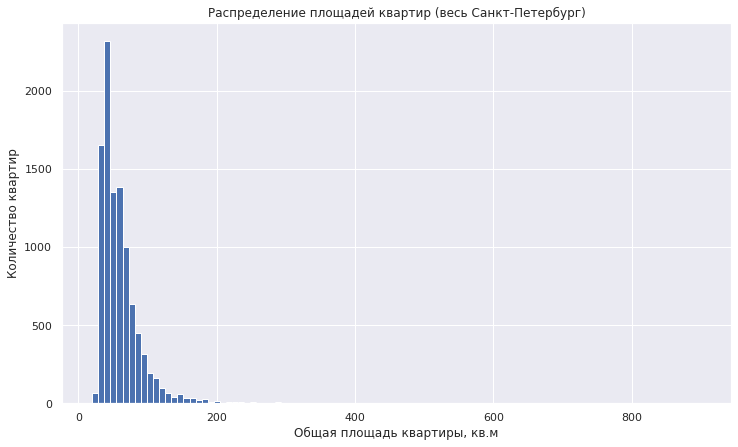

In [54]:
(spb_data_center["total_area"].plot(kind="hist", 
                                    bins=100, 
                                    title="Распределение площадей квартир (центр Санкт-Петербурга)")
                              .set(xlabel="Общая площадь квартиры, кв.м", ylabel="Количество квартир"))

plt.show()
(spb_data["total_area"].plot(kind="hist", 
                             bins=100, 
                             title="Распределение площадей квартир (весь Санкт-Петербург)")
                       .set(xlabel="Общая площадь квартиры, кв.м", ylabel="Количество квартир"));

**Вывод:** Форма распределений похожа (для квартир в центре распределение получается с большим количеством выбросов, так как выборка гораздо меньше). Средние и медианные значения площади квартир в центре значительно больше, чем остальных частях города.

<a id="4.9.2"></a>
#### 4.9.2. Цена

In [55]:
spb_data_center["last_price"].describe(percentiles=[0.025, 0.975])

count    5.570000e+02
mean     1.615670e+07
std      2.896976e+07
min      2.750000e+06
2.5%     4.295000e+06
50%      9.300000e+06
97.5%    8.218200e+07
max      4.013000e+08
Name: last_price, dtype: float64

In [56]:
spb_data["last_price"].describe(percentiles=[0.025, 0.975])

count    9.985000e+03
mean     7.012119e+06
std      8.961138e+06
min      1.200000e+06
2.5%     2.951800e+06
50%      5.200000e+06
97.5%    2.160600e+07
max      4.200000e+08
Name: last_price, dtype: float64

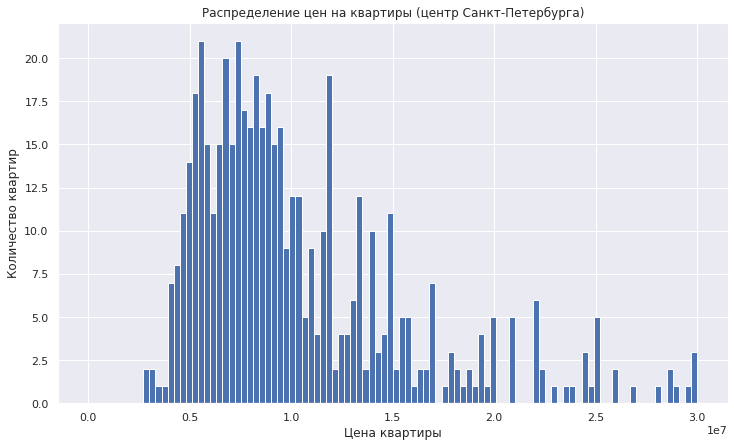

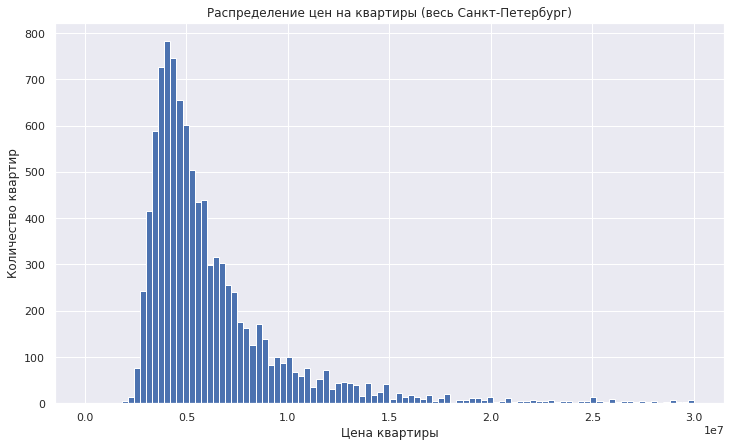

In [57]:
(spb_data_center["last_price"].plot(kind="hist", 
                                    bins=100, 
                                    range=(1e4, 3e7), 
                                    title="Распределение цен на квартиры (центр Санкт-Петербурга)")
                              .set(xlabel="Цена квартиры", ylabel="Количество квартир"))

plt.show()

(spb_data["last_price"].plot(kind="hist", 
                             bins=100, 
                             range=(1e4, 3e7), 
                             title="Распределение цен на квартиры (весь Санкт-Петербург)")
                       .set(xlabel="Цена квартиры", ylabel="Количество квартир"));

**Вывод:** форма распределений похожа, средние и медианные значения цены квартиры в центре примерно в два раза больше аналогичных значений для квартир в остальных частях города.

<a id="4.9.3"></a>
#### 4.9.3. Число комнат

In [58]:
spb_data_center["rooms"].describe()

count    557.000000
mean       3.077199
std        1.416552
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: rooms, dtype: float64

In [59]:
spb_data["rooms"].describe()

count    9985.000000
mean        2.092839
std         1.050171
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

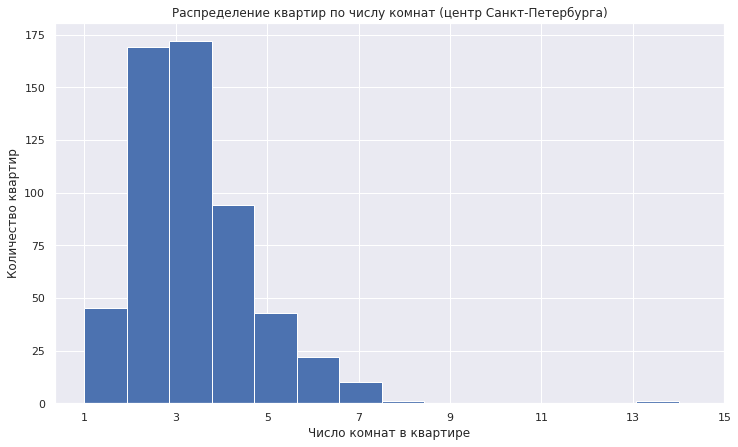

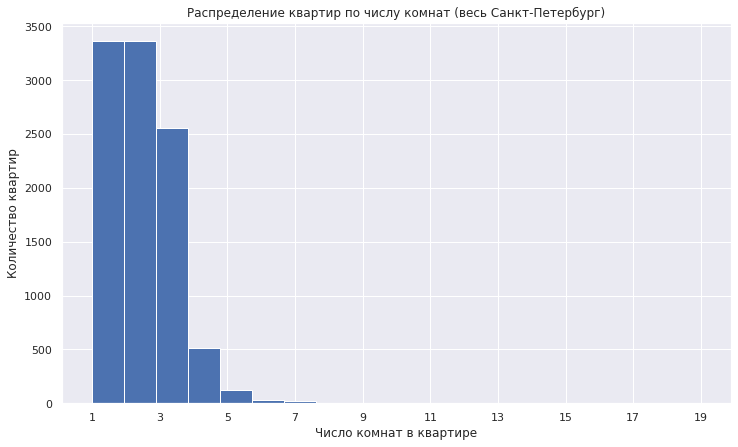

In [60]:
(spb_data_center["rooms"].plot(kind="hist", 
                               bins=14, 
                               xticks=range(1, 16, 2), 
                               title="Распределение квартир по числу комнат (центр Санкт-Петербурга)")
                         .set(xlabel="Число комнат в квартире", ylabel="Количество квартир"))

plt.show()

(spb_data["rooms"].plot(kind="hist", 
                        bins=19, 
                        xticks=range(1, 20, 2), 
                        title="Распределение квартир по числу комнат (весь Санкт-Петербург)")
                  .set(xlabel="Число комнат в квартире", ylabel="Количество квартир"));

**Вывод:** у квартир в центре в среднем на одну комнату больше, распределения несколько отличаются друг от друга, однако различия можно объяснить малым размером выборки.

<a id="4.9.4"></a>
#### 4.9.4. Высота потолков

In [61]:
spb_data_center["ceiling_height"].describe()

count    557.000000
mean       3.031311
std        0.396298
min        2.500000
25%        2.650000
50%        3.000000
75%        3.300000
max        4.900000
Name: ceiling_height, dtype: float64

In [62]:
spb_data["ceiling_height"].describe()

count    9985.000000
mean        2.694791
std         0.204401
min         2.000000
25%         2.600000
50%         2.650000
75%         2.700000
max         4.700000
Name: ceiling_height, dtype: float64

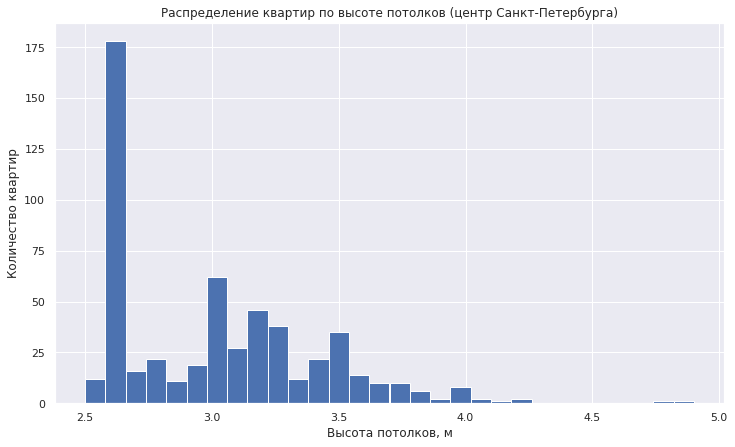

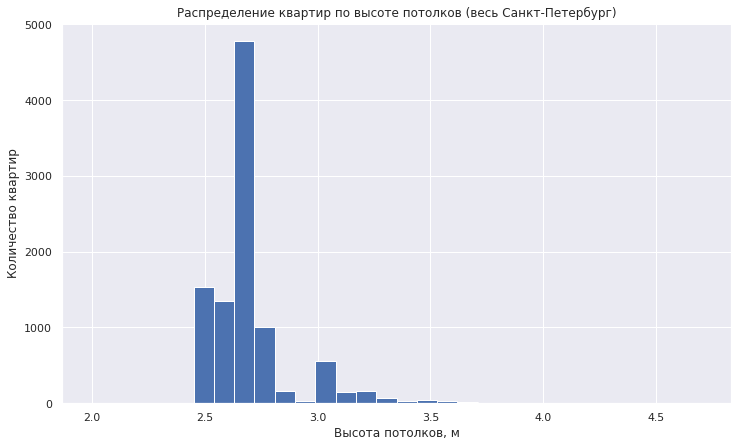

In [63]:
(spb_data_center["ceiling_height"].plot(kind="hist", 
                                        bins=30, 
                                        title="Распределение квартир по высоте потолков (центр Санкт-Петербурга)")
                                  .set(xlabel="Высота потолков, м", ylabel="Количество квартир"))

plt.show()

(spb_data["ceiling_height"].plot(kind="hist", 
                                 bins=30, 
                                 title="Распределение квартир по высоте потолков (весь Санкт-Петербург)")
                           .set(xlabel="Высота потолков, м", ylabel="Количество квартир"));

**Вывод:** распределения отдалённо похожи друг на друга, высота потолков в квартирах в центре в среднем немного выше, чем во всём городе.

<a id="4.9.5"></a>
#### 4.9.5. Факторы, влияющие на цену квартиры центре города
Посмотрим, как влияют разные факторы на цену квартиры в центре Петербурга и в городе в целом.

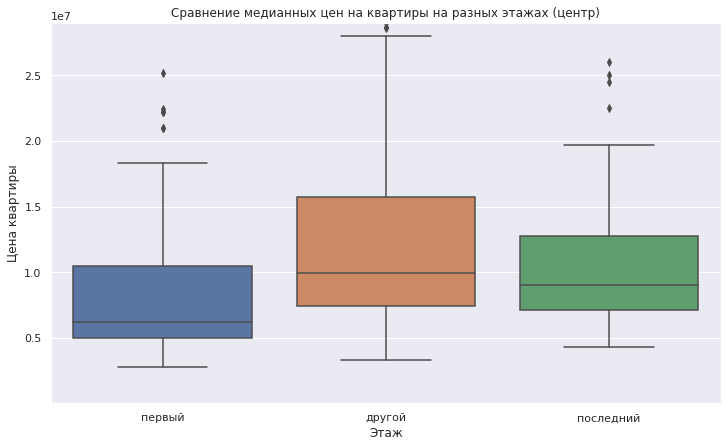

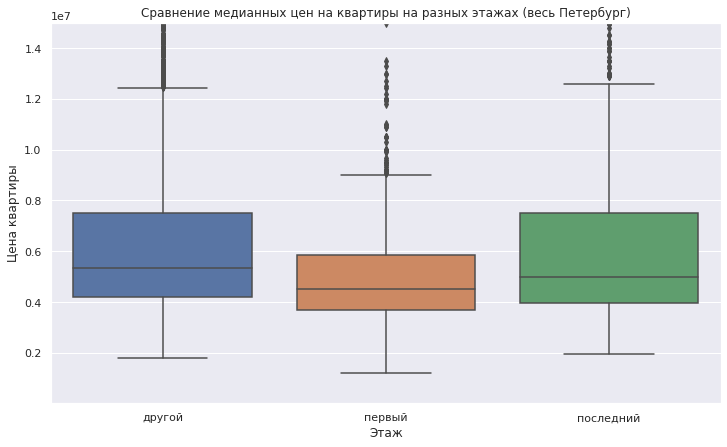

In [64]:
(sns.boxplot(x="floor_category", y="last_price", data=spb_data_center)
    .set(title="Сравнение медианных цен на квартиры на разных этажах (центр)",
         xlabel="Этаж", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.9e7)

plt.show()

(sns.boxplot(x="floor_category", y="last_price", data=spb_data)
    .set(title="Сравнение медианных цен на квартиры на разных этажах (весь Петербург)",
         xlabel="Этаж", ylabel="Цена квартиры"))

plt.ylim(1e4, 1.5e7);

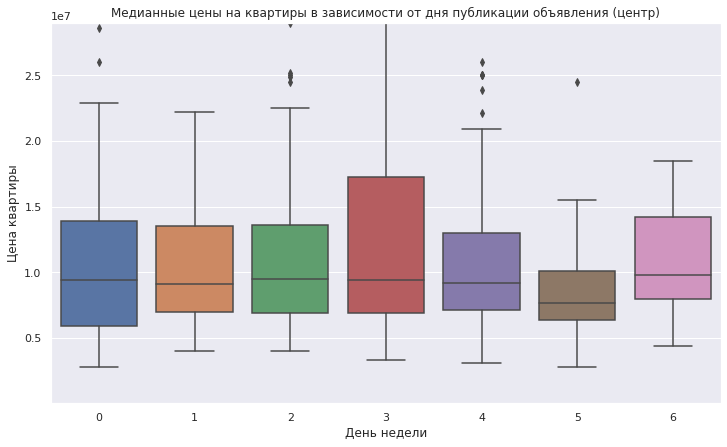

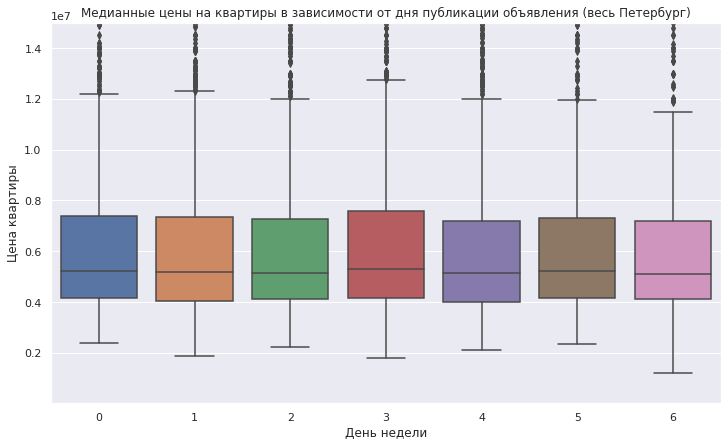

In [65]:
(sns.boxplot(x="weekday_exposition", y="last_price", data=spb_data_center)
    .set(title="Медианные цены на квартиры в зависимости от дня публикации объявления (центр)",
         xlabel="День недели", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.9e7)
plt.show()

(sns.boxplot(x="weekday_exposition", y="last_price", data=spb_data)
    .set(title="Медианные цены на квартиры в зависимости от дня публикации объявления (весь Петербург)",
         xlabel="День недели", ylabel="Цена квартиры"))

plt.ylim(1e4, 1.5e7);

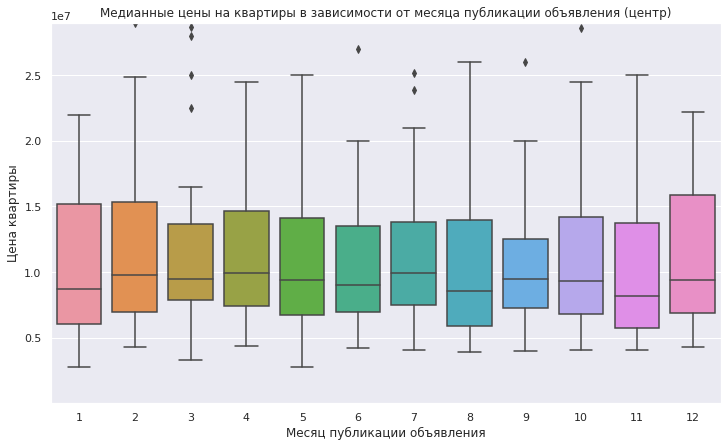

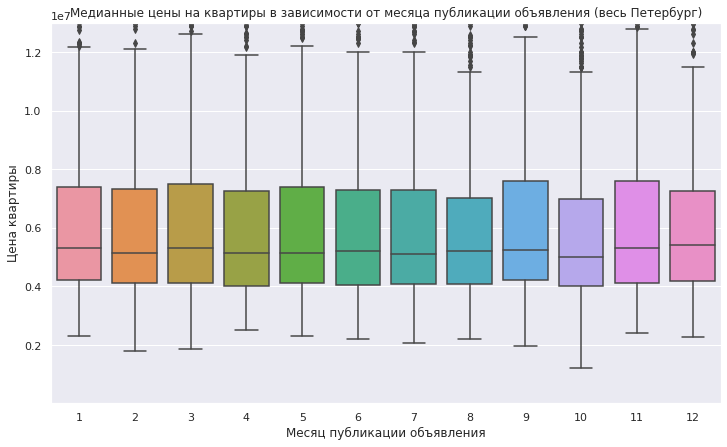

In [66]:
(sns.boxplot(x="month_exposition", y="last_price", data=spb_data_center)
    .set(title="Медианные цены на квартиры в зависимости от месяца публикации объявления (центр)",
         xlabel="Месяц публикации объявления", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.9e7)
plt.show()

(sns.boxplot(x="month_exposition", y="last_price", data=spb_data)
    .set(title="Медианные цены на квартиры в зависимости от месяца публикации объявления (весь Петербург)",
         xlabel="Месяц публикации объявления", ylabel="Цена квартиры"))

plt.ylim(1e4, 1.3e7);

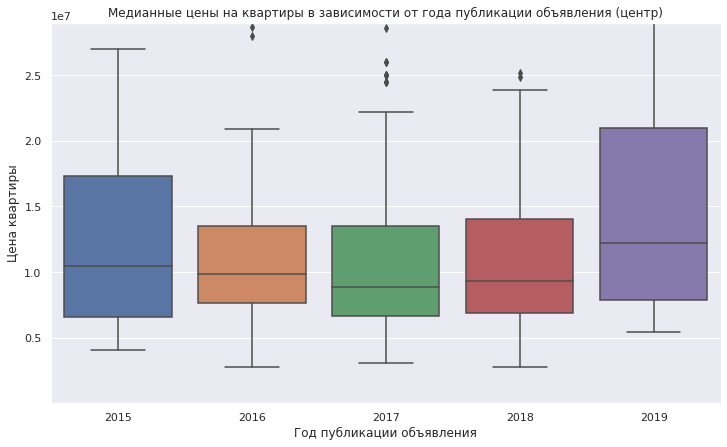

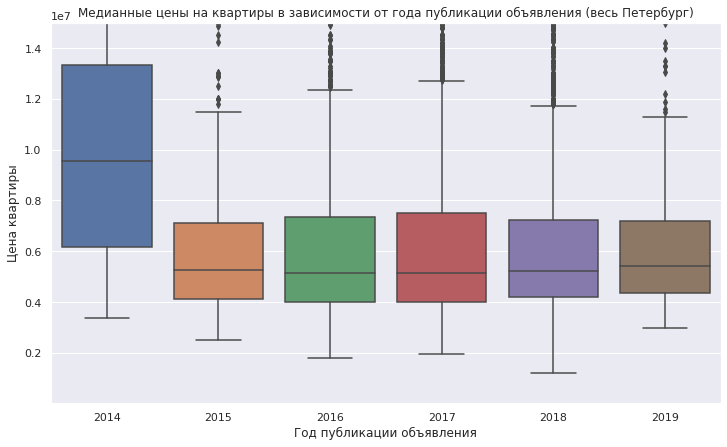

In [67]:
(sns.boxplot(x="year_exposition", y="last_price", data=spb_data_center)
    .set(title="Медианные цены на квартиры в зависимости от года публикации объявления (центр)",
         xlabel="Год публикации объявления", ylabel="Цена квартиры"))

plt.ylim(1e4, 2.9e7)
plt.show()

(sns.boxplot(x="year_exposition", y="last_price", data=spb_data)
    .set(title="Медианные цены на квартиры в зависимости от года публикации объявления (весь Петербург)",
         xlabel="Год публикации объявления", ylabel="Цена квартиры"))

plt.ylim(1e4, 1.5e7);

Из приведённых выше диаграмм размаха можно сделать следующие выводы:
- квартиры на первом этаже в центре города стоят несколько меньше, чем на других этажах;
- цена на квартиру практически не зависит от дня недели, в который было опубликовано объявление о продаже (для объявлений, размещённых в субботу, цена немного ниже, что может быть связано с малых количеством данных);
- в январе, августе и ноябре медианная цена квартиры в центре была наименьшей, а в феврале, апреле и декабре - наибольшей;
- в 2019-м году квартира в центре стала стоить гораздо больше, чем в предшествующие годы.

Однако эти выводы (за исключением влияния этажа на цену) не подтверждаются, если рассматривать квартиры во всём Петербурге.

Построим матрицы корреляций:

(квартиры в центре города)

In [68]:
spb_data_center[features].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.594965,0.267792,-0.145251
total_area,0.594965,1.000000,0.748912,-0.165364
rooms,0.267792,0.748912,1.000000,-0.108804
cityCenters_nearest,-0.145251,-0.165364,-0.108804,1.000000


(квартиры в городе в целом)

In [69]:
spb_data[features].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.743068,0.423945,-0.253584
total_area,0.743068,1.000000,0.764795,-0.279926
rooms,0.423945,0.764795,1.000000,-0.239820
cityCenters_nearest,-0.253584,-0.279926,-0.239820,1.000000


**Вывод:** Как видно из построенных матриц, на цену квартиры в центре  наибольшее положительное влияние оказывает размер площади, число комнат слабо влияет на стоимость, а удалённость от центра отрицательно влияет на то, сколько будет стоить квартира. Это справедливо и для квартир в городе в целом, причём все взаимосвязи выражены сильнее.

Напоследок посмотрим, как влияют остальные признаки на цену квартиры во всём городе. Найдём матрицу корреляций Пирсона и построим тепловую карту по этим значениям:

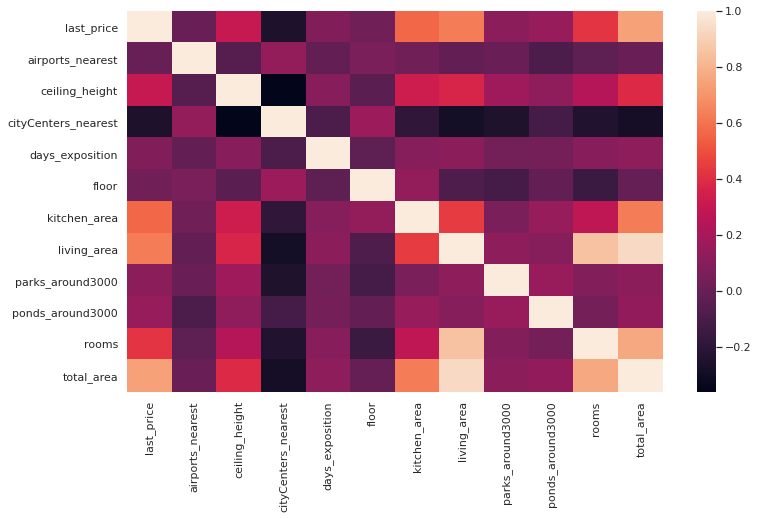

In [70]:
params = [
    "last_price",
    "airports_nearest",
    "ceiling_height",
    "cityCenters_nearest",
    "days_exposition",
    "floor",
    "kitchen_area",
    "living_area",
    "parks_around3000",
    "ponds_around3000",
    "rooms",
    "total_area"
]

sns.heatmap(spb_data[params].corr());

Выводы, сделанные ранее подтверждаются: квартира тем дороже, чем больше её площадь, чем больше в ней комнат и чем ближе она к центру. Некоторое положительное влияние оказывают высота потолков, жилая площадь и площадь кухни (последние два фактора зависят от общей площади квартиры, поэтому неудивительно, что они тоже влияют). 

<a id="4.10"></a>
### 4.10. Вывод
После проведения анализа, можно выделить несколько основных факторов, которые влияют на цену квартиры. Цена тем больше, чем больше **общая площадь квартиры**, **количество комнат в ней** и **высота потолков** и чем меньше **расстояние от квартиры до центра**. Существенного влияния даты публикации объявления на стоимость не обнаружено. 

<a id="5"></a>
## 5. Заключение
В проекте проведён предварительный анализ данных (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет). В ходе анализа были обнаружены пропущенные и некорректные значения, которые были обработаны для некоторых признаков, часть пропусков оставлена без изменений. Заменены типы данных в некоторых столбцах, добавлены новые признаки, полученные из уже имеющихся. 

Проведён анализ влияния различных факторов на цену квартиры. Проведён сравнительный анализ факторов, влияющих на цену квартир во всём Санкт-Петербурге и в центре города. Факторы, которые влияют на цену, одинаковы для квартир в центре, и во всём городе.

**Положительно** коррелируют с ценой:
- общая площадь квартиры;
- количество комнат;
- высота потолков.

**Отрицательно:**
- расстояние от квартиры до центра города.

Цена квартир на первом этаже несколько меньше, чем квартир на других этажах, но в остальном этаж **не оказывает заметного влияния** на цену. Существенного влияния других факторов (даты публикации, расстояния до аэропорта, парков, водоёмов) установить не удалось. 